In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from matplotlib.ticker import AutoMinorLocator

In [4]:
dir = '/Users/esaliya/sali/data/cog/uniqs/shuffled'
file = 'shuffled_1769181_unique_of_1785722_prot2003-2014.fa'

f = f"{dir}/{file}"

limit = 'inf'

lengths = list()
with open(f, "r") as infh:
    count = 0
    for record in SeqIO.parse(infh, "fasta"):
        if limit != 'inf' and count == limit:
            break
        lengths.append(len(record))
        count += 1

tag = str(count)+"_of_" if limit != 'inf' else "all"
of = f'{dir}/hist_of_{tag}_{Path(file).stem}.jpg'

lengths = np.array(lengths)

In [5]:
frq, edges = np.histogram(lengths, bins='auto')

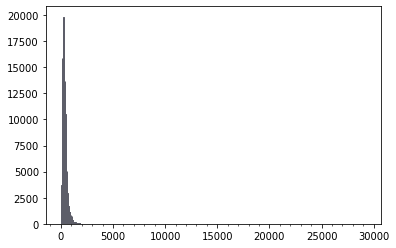

In [43]:
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="#5d5e69", color="#5d5e69", align="edge")
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.show()

1766452


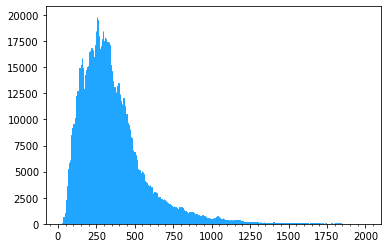

In [44]:
lt2k = edges[edges<=2000]
lt2kf = frq[:lt2k.shape[0]-1]
print(np.sum(lt2kf))
fig, ax = plt.subplots()
ax.bar(lt2k[:-1], lt2kf, width=np.diff(lt2k), ec="#21a6ff", color="#21a6ff", align="edge")
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.show()

1731330


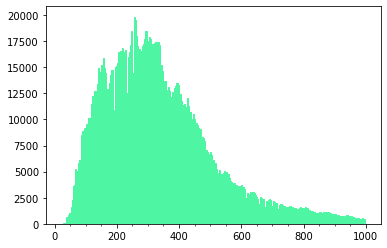

In [45]:
lt1k = edges[edges<=1000]
lt1kf = frq[:lt1k.shape[0]-1]
print(np.sum(lt1kf))
fig, ax = plt.subplots()
ax.bar(lt1k[:-1], lt1kf, width=np.diff(lt1k), ec="#4ef5a2", color="#4ef5a2", align="edge")
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.show()

In [6]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(50, 20))
n, bins, patches = plt.hist(lengths, bins='auto', edgecolor='black', log=False)

In [8]:
patch_width = bins[1] - bins[0]
plt.title("Histogram of Sequence Lengths")
plt.ylim(0.1, np.max(n) + 20)
# plt.minorticks_on()
plt.xlabel("Sequence Length")
plt.ylabel("# Sequences")
# ax = plt.gca()
# ax.yaxis.grid(which='both')
# ax.set_xticks(np.arange(bins[0]+(patch_width/2), bins[-1]+0.5, patch_width*1))
# ax.set_xticklabels(np.stack((np.around(bins[0:len(bins) - 1], 2),
#                              np.around(bins[0:len(bins) - 1] + patch_width, 2)), 0).T)
# for i in range(len(n)):
#     plt.text(bins[i] + 0.2, n[i] + np.log(2), str(int(n[i])))
# plt.show()
plt.savefig(of)